In [1]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns


#loading data

dataset=load_dataset('lukebarousse/data_jobs')
df= dataset['train'].to_pandas()

# Data Cleanup

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])
df['job_skills']=df['job_skills'].apply(lambda skill_list:ast.literal_eval(skill_list)if pd.notna(skill_list) else skill_list)



c:\Users\Pratyaksh\anaconda3\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_da_us= df[(df['job_title_short']=='Data Analyst') & (df['job_country']=='United States')].copy()

df_da_us= df_da_us.dropna(subset='salary_year_avg')

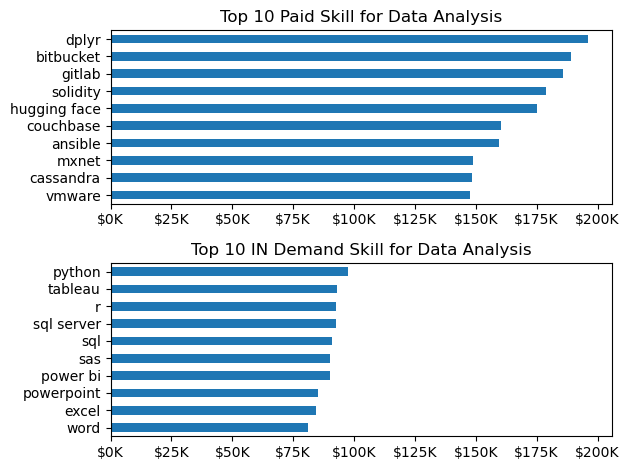

In [3]:
# Exploding Each Skill
df_da_us=df_da_us.explode('job_skills')
df_da_us['job_skills']

# Grouping job skills with mean and count salary year avg
df_da_us_group=df_da_us.groupby('job_skills')['salary_year_avg'].agg(['count','median'])

#Getting top 10 Most paid skills
df_da_us_top_paid=df_da_us_group.sort_values(by='median',ascending=False).head(10)

#Getting top 10 Most in demand skills
df_da_us_top_skills=df_da_us_group.sort_values(by='count',ascending=False).head(10).sort_values(by='median',ascending=False).head(10)


#Ploting them as horizontal bar with matplotlib
fig, ax = plt.subplots(2,1)

df_da_us_top_paid.plot(kind='barh',y='median',ax=ax[0],legend=False)
ax[0].invert_yaxis()
ax[0].set_title("Top 10 Paid Skill for Data Analysis")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(lambda x,_: f"${int(x/1000)}K")

df_da_us_top_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)
ax[1].invert_yaxis()
ax[1].set_title("Top 10 IN Demand Skill for Data Analysis")
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x,_: f"${int(x/1000)}K")
fig.tight_layout()



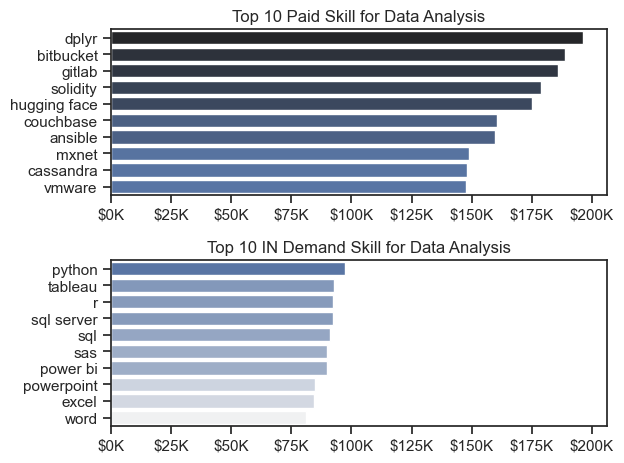

In [16]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style="ticks")

#df_da_us_top_paid.plot(kind='barh',y='median',ax=ax[0],legend=False)

sns.barplot(data=df_da_us_top_paid,x='median',y=df_da_us_top_paid.index,ax=ax[0],hue='median',palette='dark:b_r',legend=False)
# ax[0].invert_yaxis()
ax[0].set_title("Top 10 Paid Skill for Data Analysis")
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(lambda x,_: f"${int(x/1000)}K")

#df_da_us_top_skills.plot(kind='barh',y='median',ax=ax[1],legend=False)


sns.barplot(data=df_da_us_top_skills,x='median',y=df_da_us_top_skills.index,ax=ax[1],hue='median',palette='light:b',legend=False)
# ax[1].invert_yaxis()
ax[1].set_title("Top 10 IN Demand Skill for Data Analysis")
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].get_xlim())
ax[1].xaxis.set_major_formatter(lambda x,_: f"${int(x/1000)}K")
fig.tight_layout()

Text(12.444444444444445, 0.5, 'Number of Jobs')

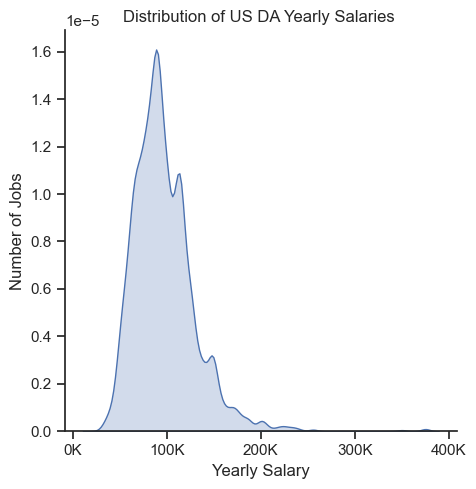

In [21]:


sns.displot(df_da_us['salary_year_avg'],kind='kde',fill=True)
ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_:f"{int(x/1000):}K"))
plt.title("Distribution of US DA Yearly Salaries ")
plt.xlabel('Yearly Salary')
plt.ylabel('Number of Jobs')

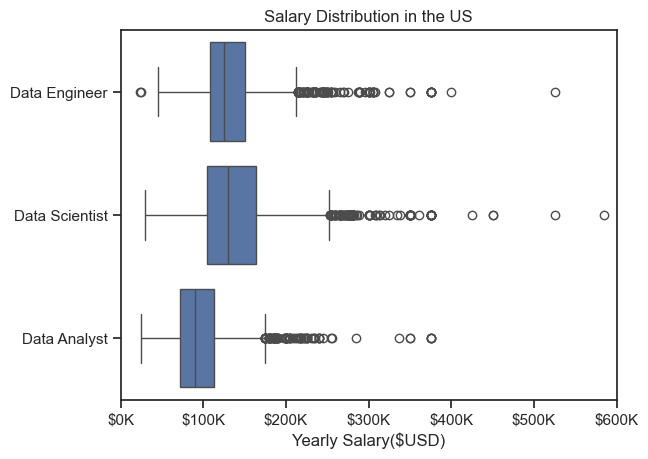

In [24]:

sns.boxplot(data=df_us,x='salary_year_avg',y='job_title_short')

ax=plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f"${int(x/1000)}K"))
plt.xlim(0,600000)
plt.ylabel("")
plt.title('Salary Distribution in the US')
plt.xlabel('Yearly Salary($USD)')
plt.show()

In [22]:
job_titles=['Data Analyst','Data Scientist','Data Engineer']

df_us=df[(df['job_title_short'].isin(job_titles)) & (df['job_country']=='United States')].copy()
df_us=df_us.dropna(subset='salary_year_avg')
job_list=[df_us[df_us['job_title_short']==job_title]['salary_year_avg'] for job_title in job_titles]